In [ ]:
!nvidia-smi

Fri Aug  9 21:10:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 34.6/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# # mount it
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data=/content/maskEmotions+NandiniEmotions/data.yaml epochs=50 imgsz=640 plots=True batch=32

/content
100% 131M/131M [00:03<00:00, 37.6MB/s]
New https://pypi.org/project/ultralytics/8.2.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/maskEmotions+NandiniEmotions/data.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_s

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1723237885.4d304a5ddc3a.7438.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch8880.jpg  weights
P_curve.png					    train_batch8881.jpg
PR_curve.png					    train_batch8882.jpg


/content


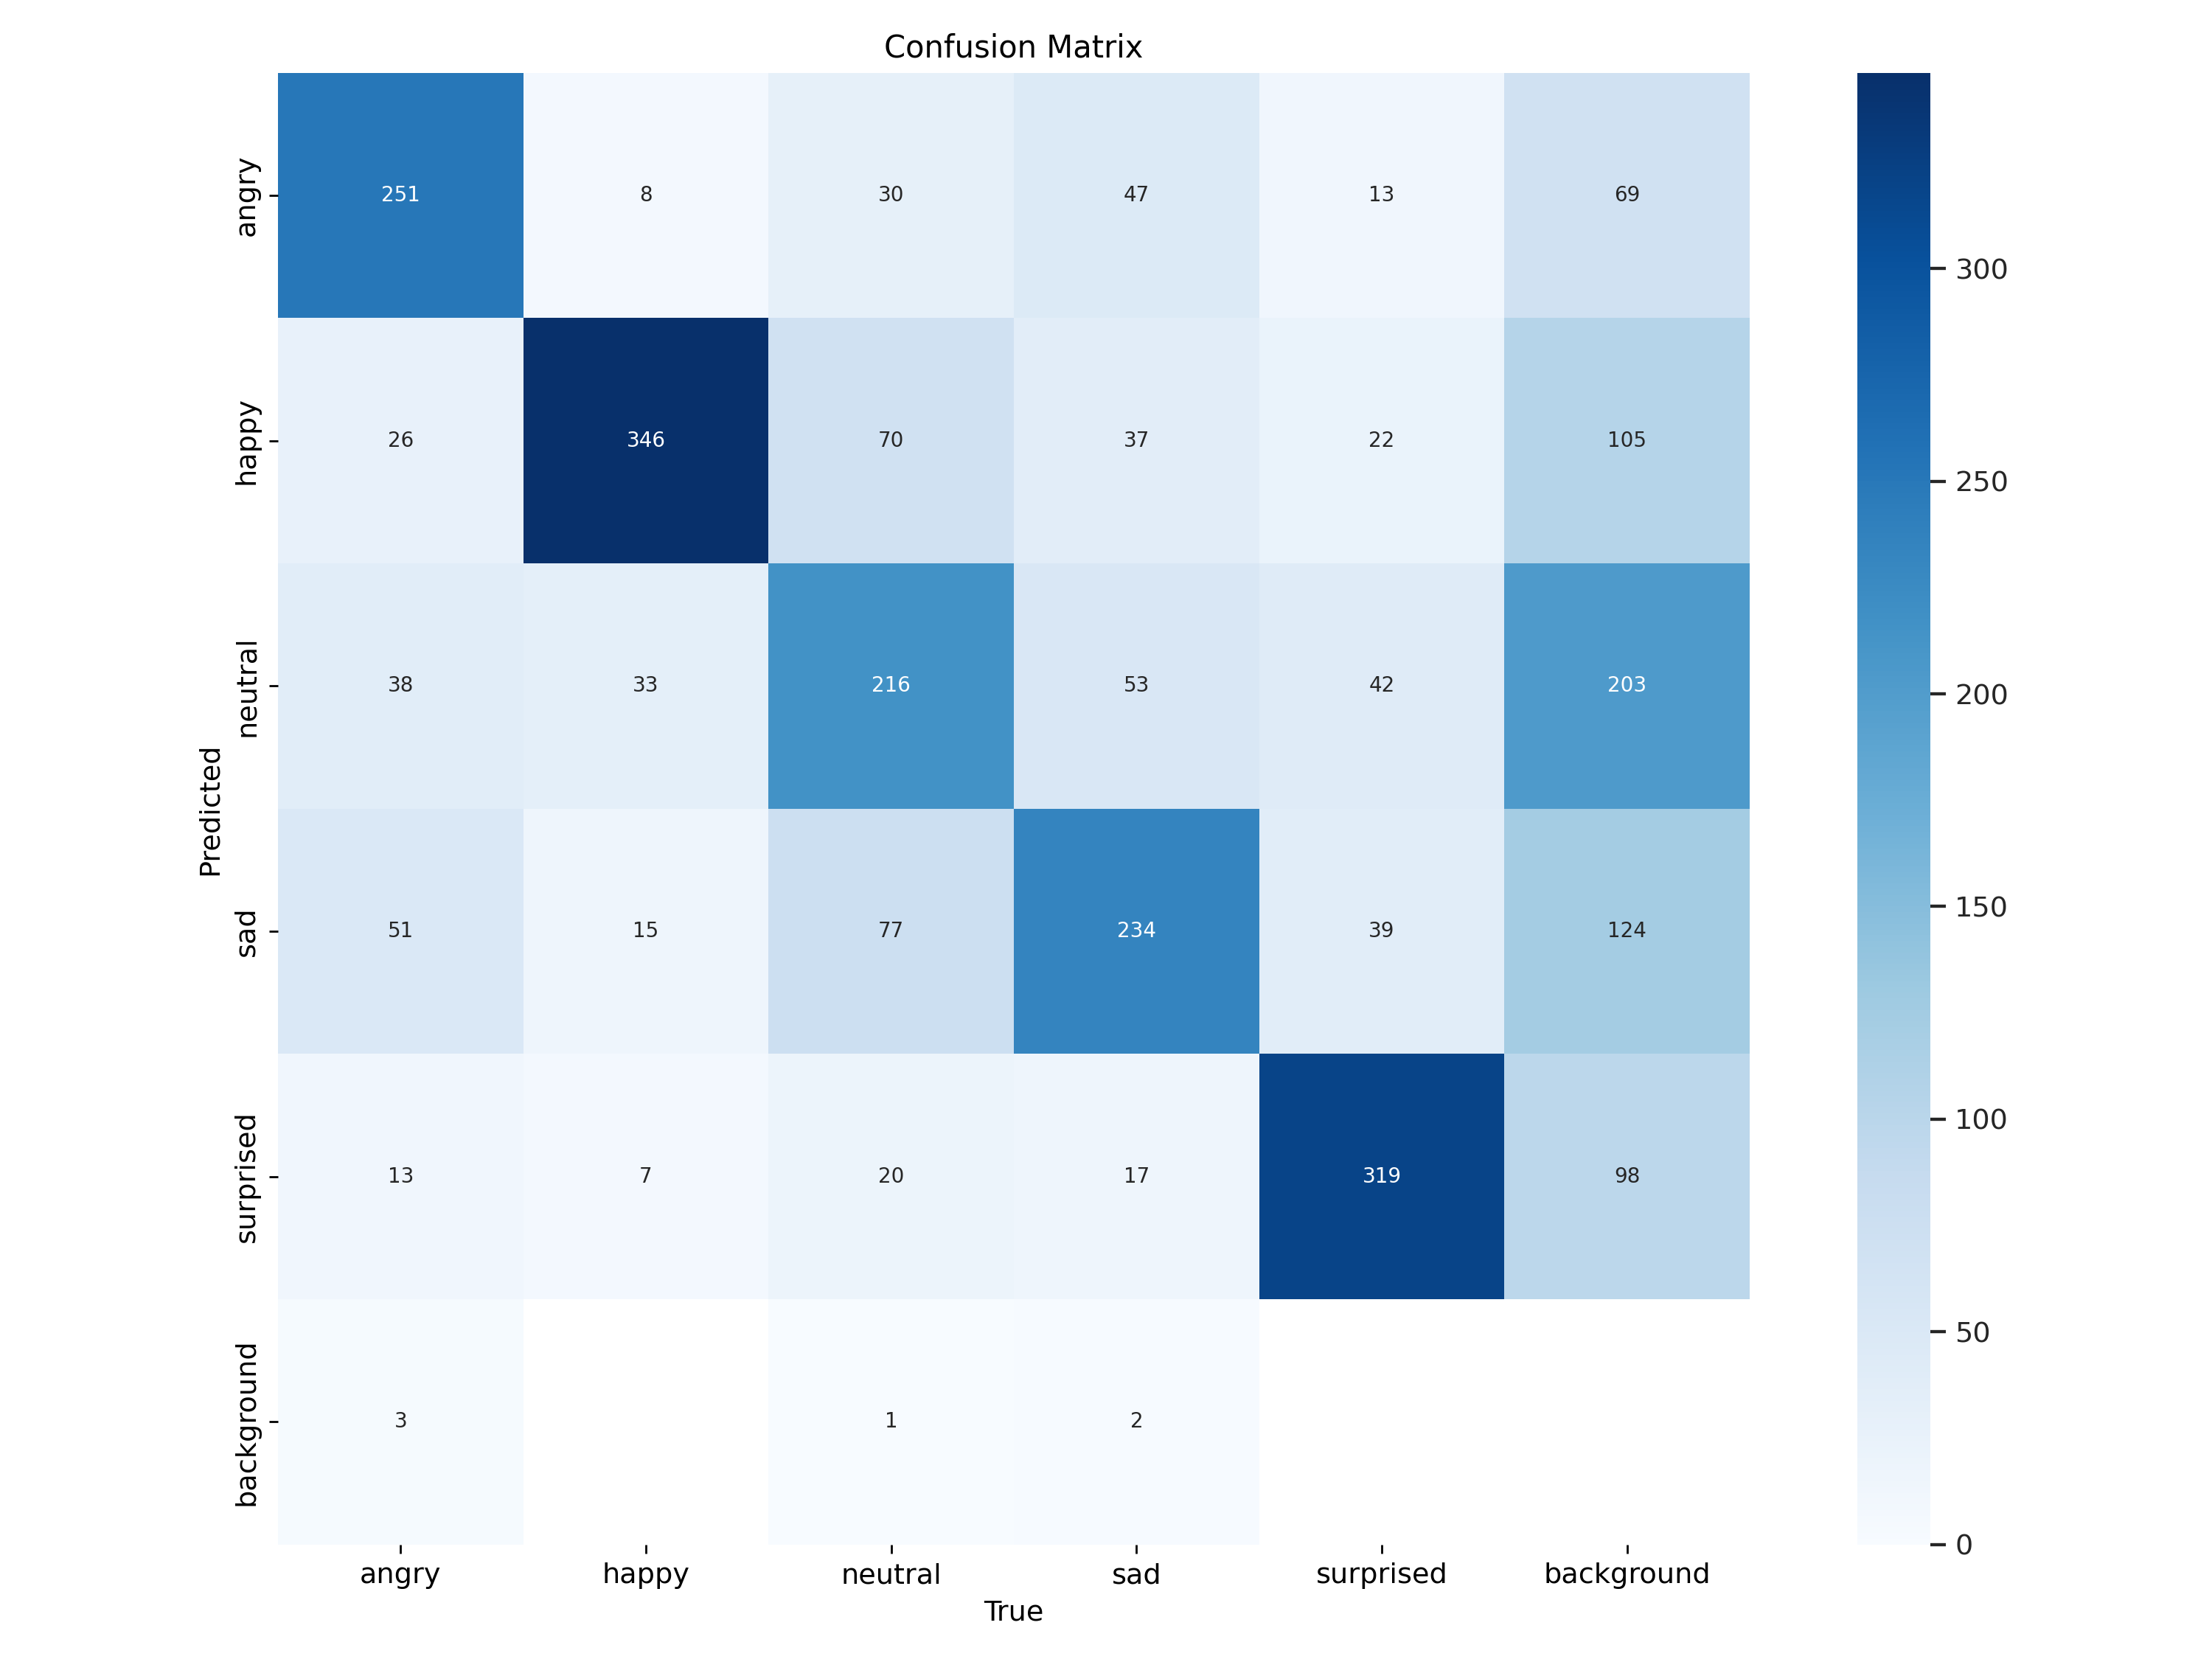

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


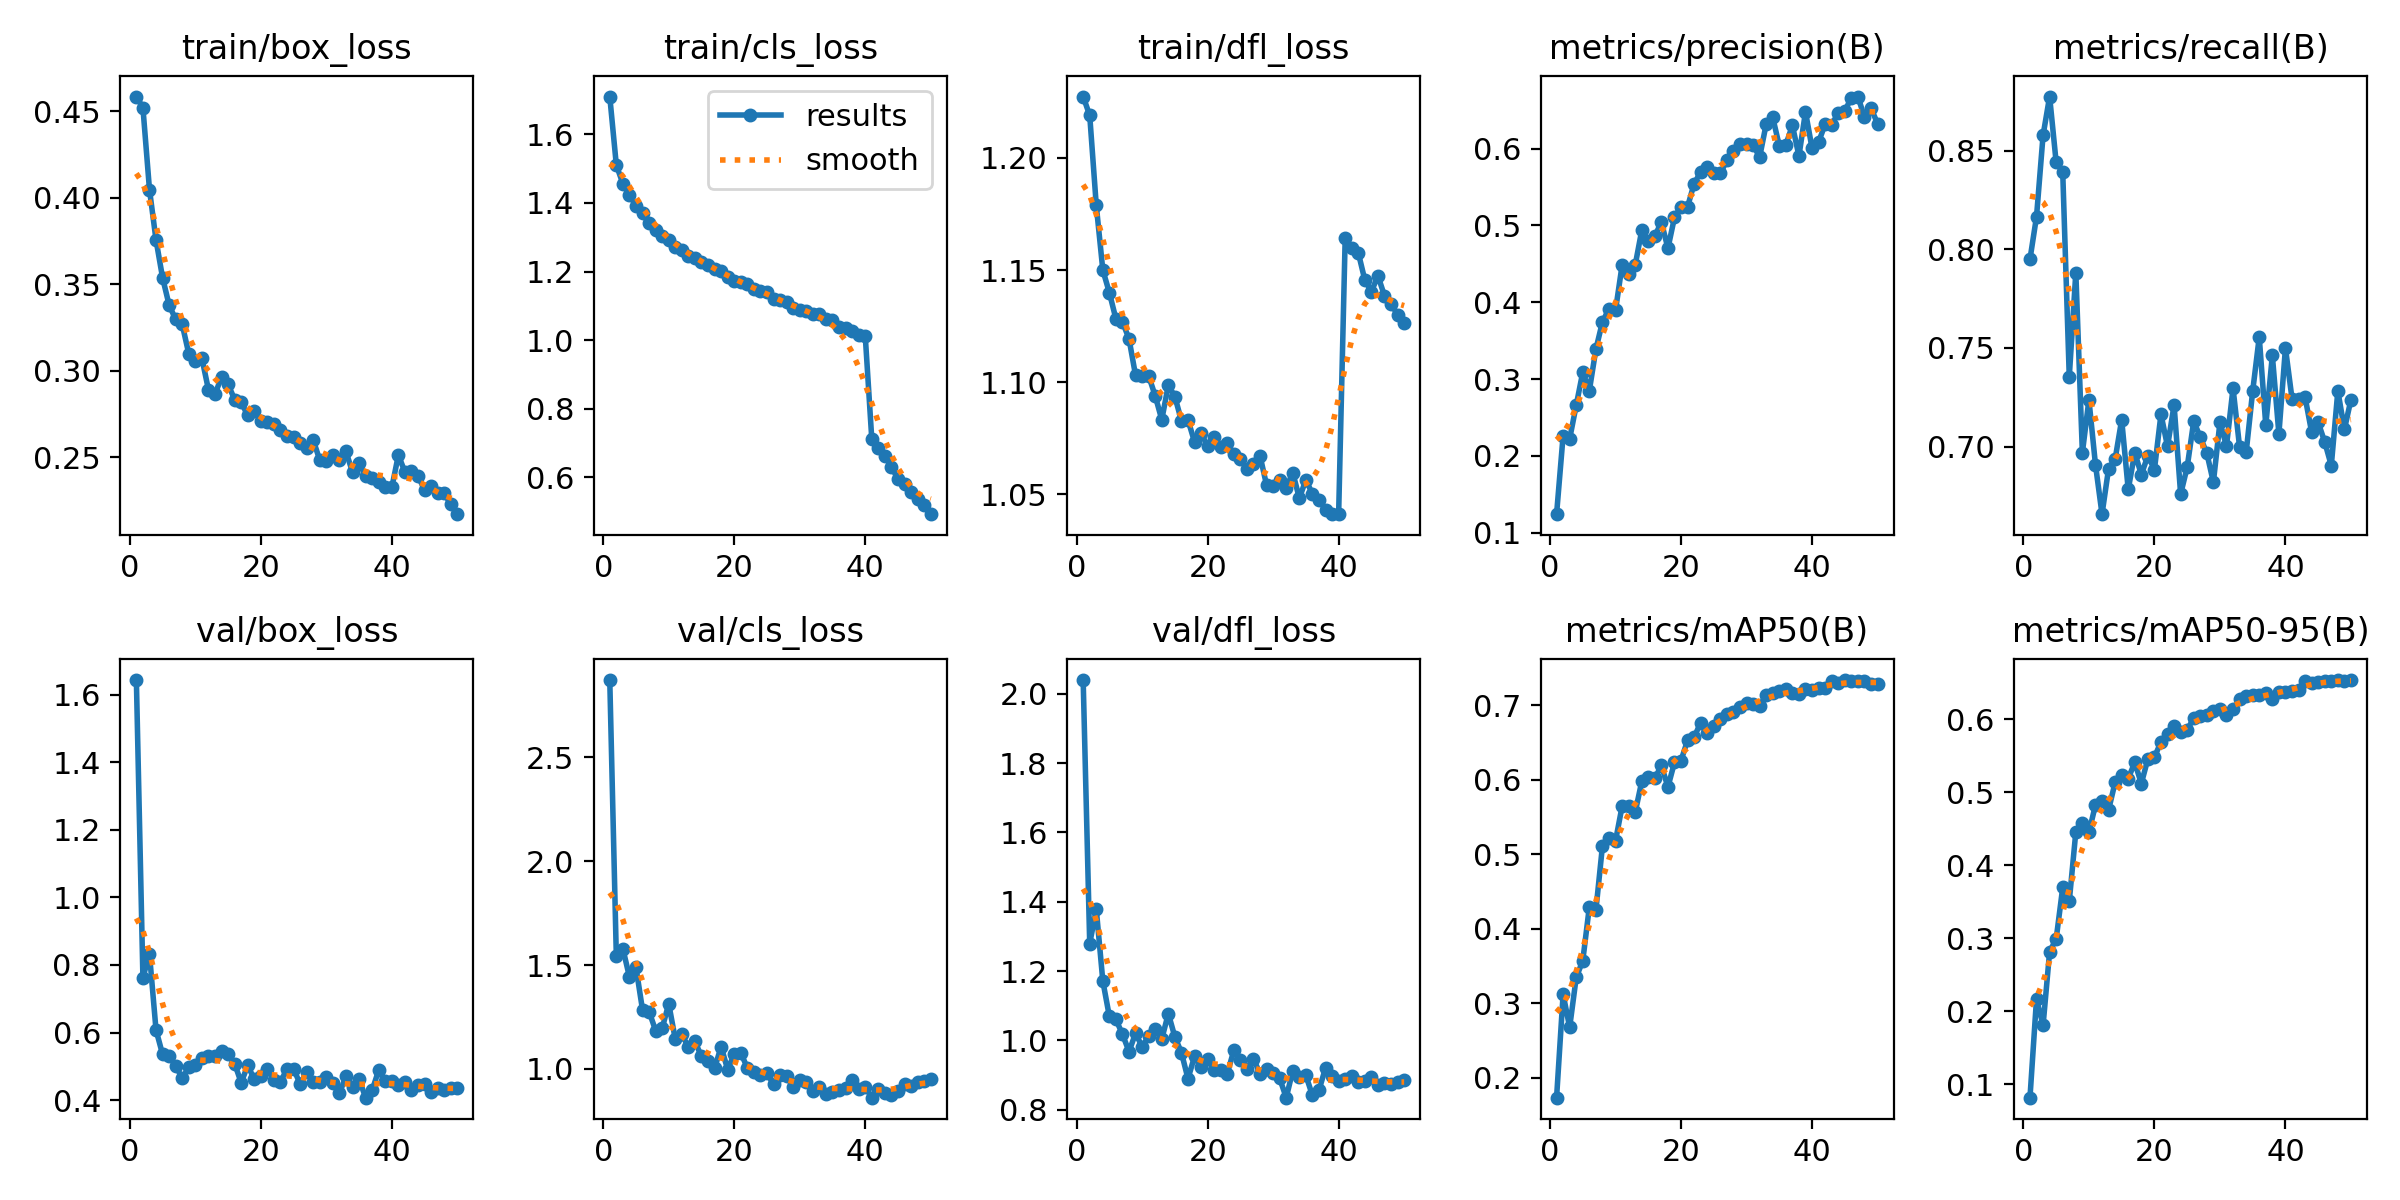

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


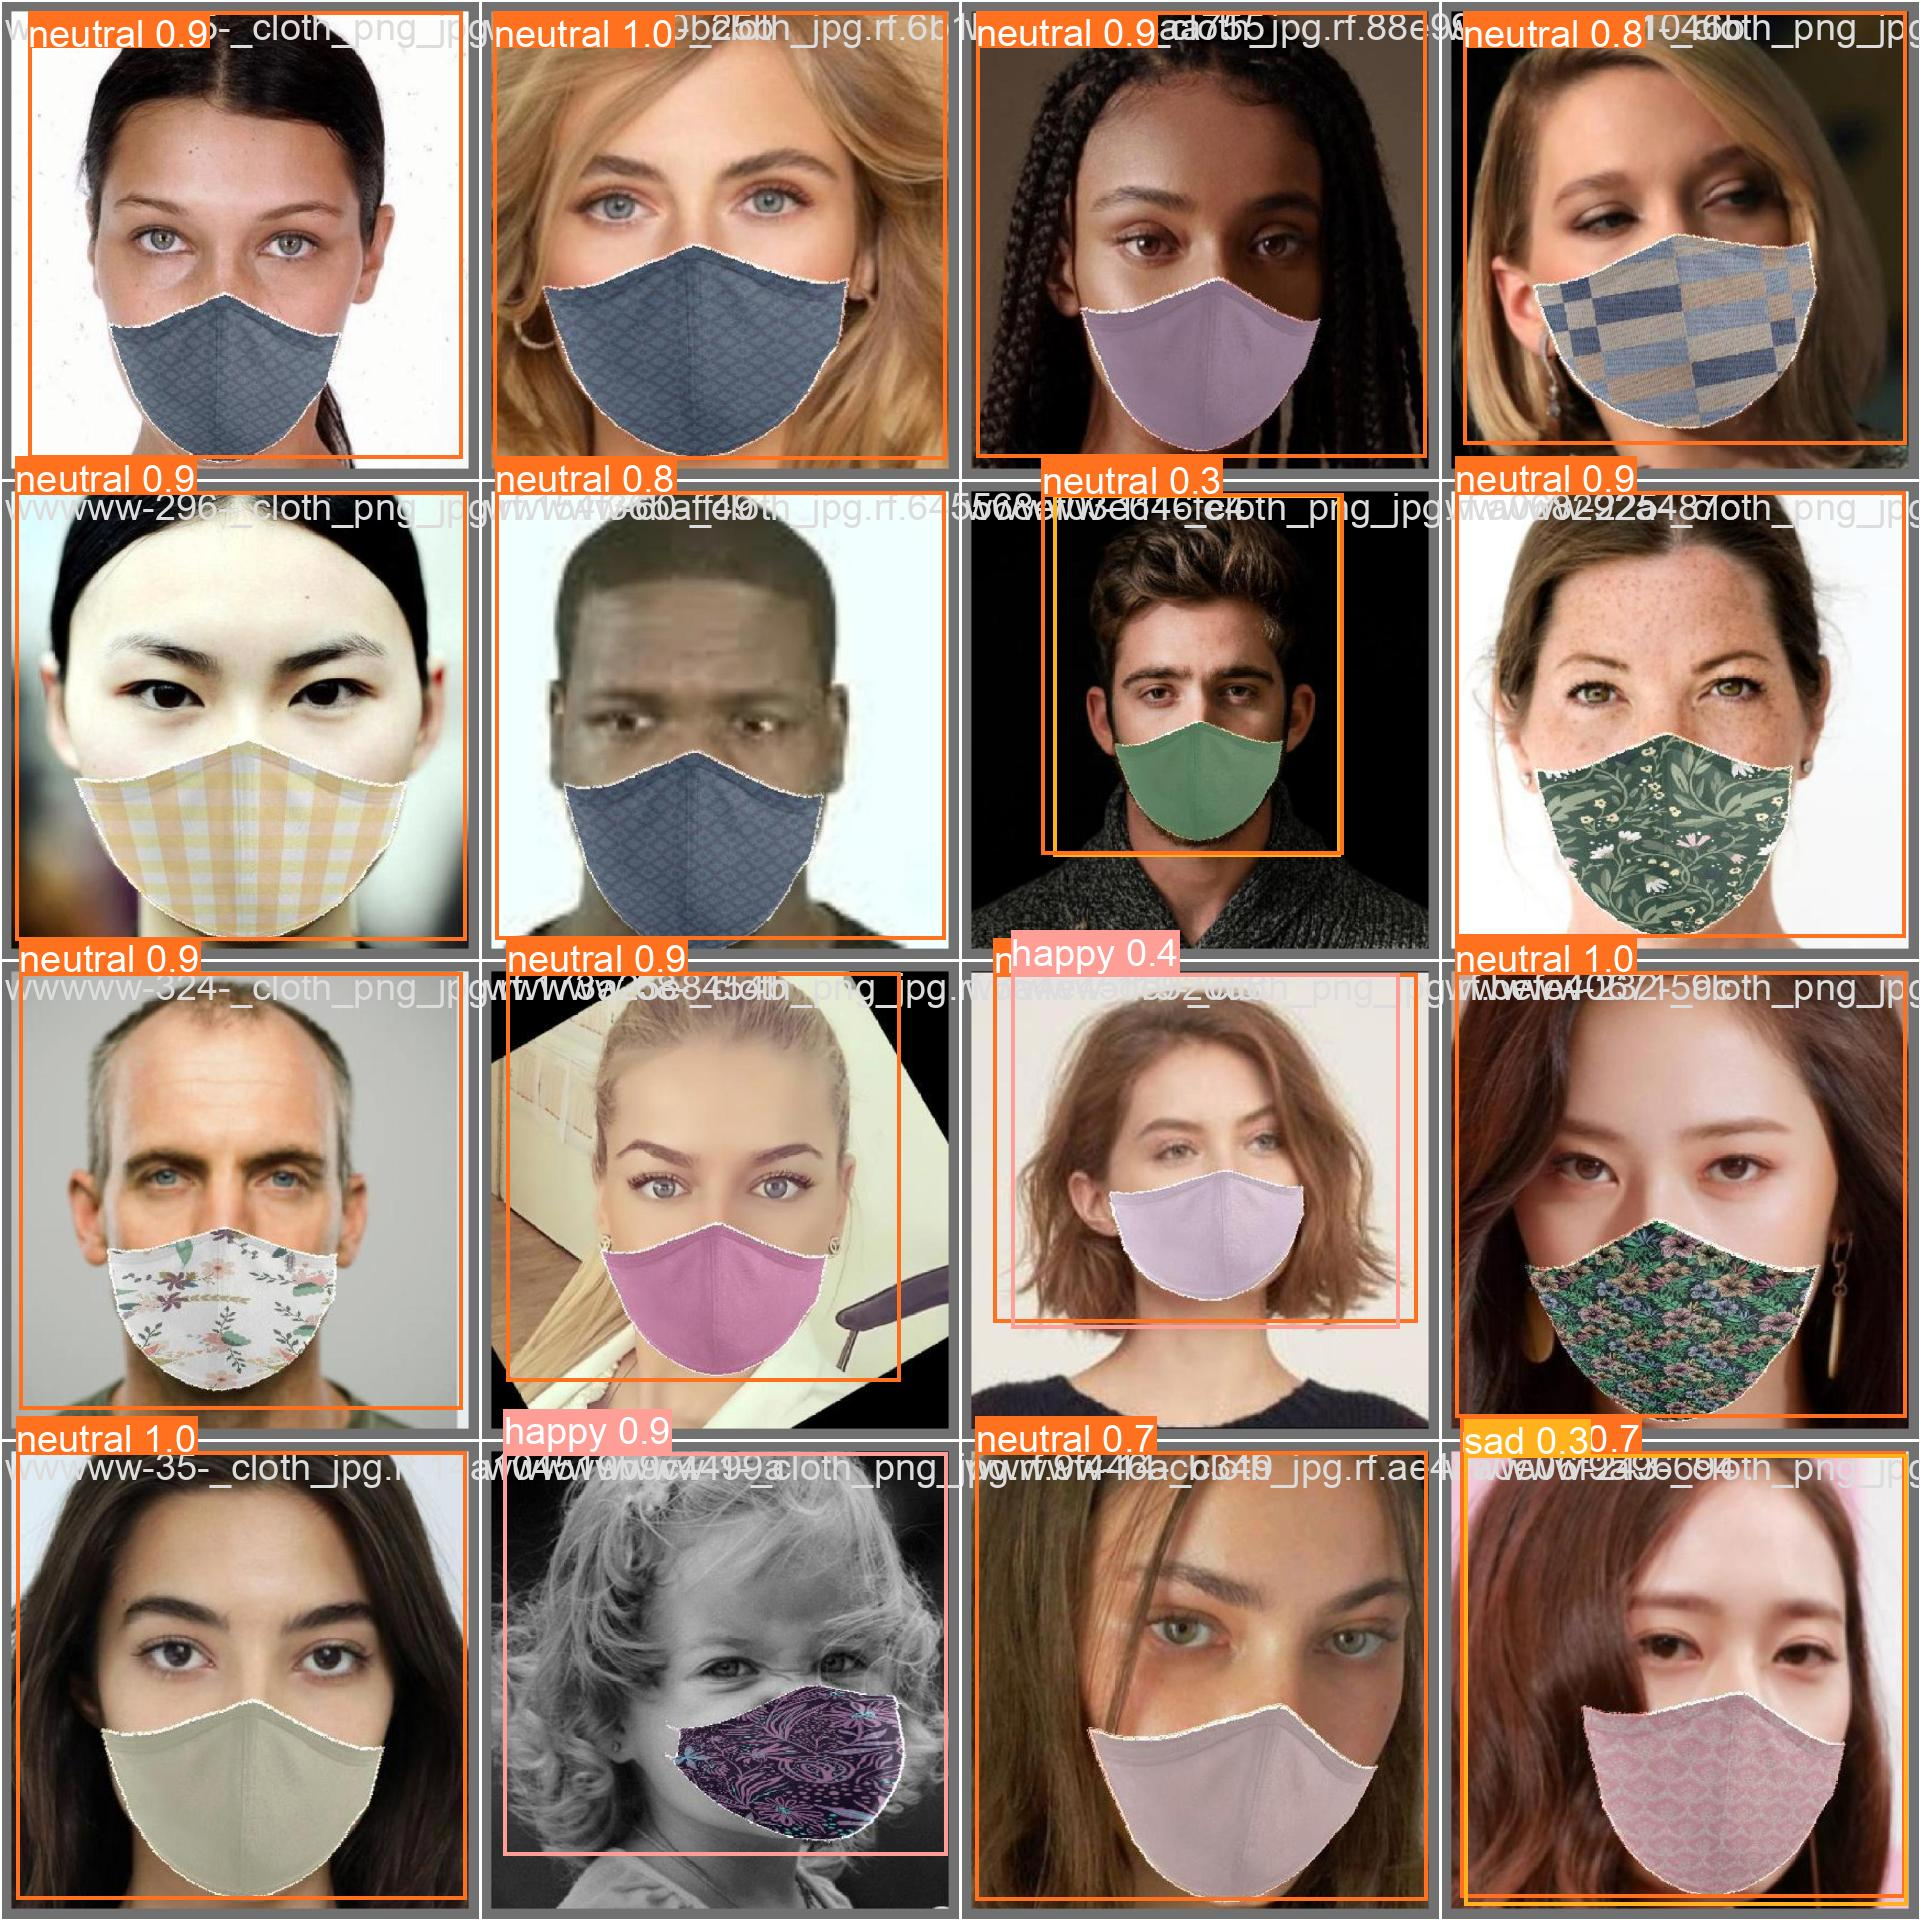

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/maskEmotions+NandiniEmotions/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68128383 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/maskEmotions+NandiniEmotions/valid/labels.cache... 2030 images, 0 backgrounds, 0 corrupt: 100% 2030/2030 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 127/127 [00:20<00:00,  6.09it/s]
                   all       2030       2030      0.641      0.727      0.732      0.654
                 angry       2030        382      0.702      0.691      0.735      0.629
                 happy       2030        409       0.65      0.883       0.81      0.767
               neutral       2030        414      0.521      0.625      0.614      0.533
                   sad       2030        390      0.544      0.649      0.636      0.539
             surprised       2030        435      0.787       0.79      0.864        0.8
S

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/maskEmotions+NandiniEmotions/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68128383 parameters, 0 gradients, 257.4 GFLOPs

image 1/1012 /content/maskEmotions+NandiniEmotions/test/images/000111_png_jpg.rf.ecbe3df3400a60b43a95c44ccb9e1a0d.jpg: 640x640 1 neutral, 12.5ms
image 2/1012 /content/maskEmotions+NandiniEmotions/test/images/000378_cloth_png_jpg.rf.8b26b09f69131e918745cbcbef914cb7.jpg: 640x640 1 neutral, 11.9ms
image 3/1012 /content/maskEmotions+NandiniEmotions/test/images/000609_png_jpg.rf.16f4d8f8f03c09a22094764fbff61cbd.jpg: 640x640 1 neutral, 11.1ms
image 4/1012 /content/maskEmotions+NandiniEmotions/test/images/001442_png_jpg.rf.86bfdb539ee9e583fabe8a2d24f574a5.jpg: 640x640 1 neutral, 10.8ms
image 5/1012 /content/maskEmotions+NandiniEmotions/test/images/01e5046c30a7154ad5bf08f58d2d9864_png_jpg.rf.3fb263e5ff3c36d41327ead4f40fe017.jpg: 640x640 1 sad, 11.0ms
image 6/1012 /content/maskEmotions+NandiniEmotions/tes

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/imgs save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68128383 parameters, 0 gradients, 257.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/imgs/20240807_210827.jpg: 640x384 1 happy, 147.9ms
image 2/5 /content/imgs/IMG-20240807-WA0022.jpg: 640x480 1 neutral, 134.3ms
image 3/5 /content/imgs/IMG-20240807-WA0044.jpg: 640x480 1 surprised, 11.1ms
image 4/5 /content/imgs/IMG-20240807-WA0062.jpg: 640x480 1 sad, 11.5ms
image 5/5 /content/imgs/IMG-20240808-WA0018.jpg: 640x480 1 angry, 11.5ms
Speed: 3.6ms preprocess, 63.3ms inference, 152.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


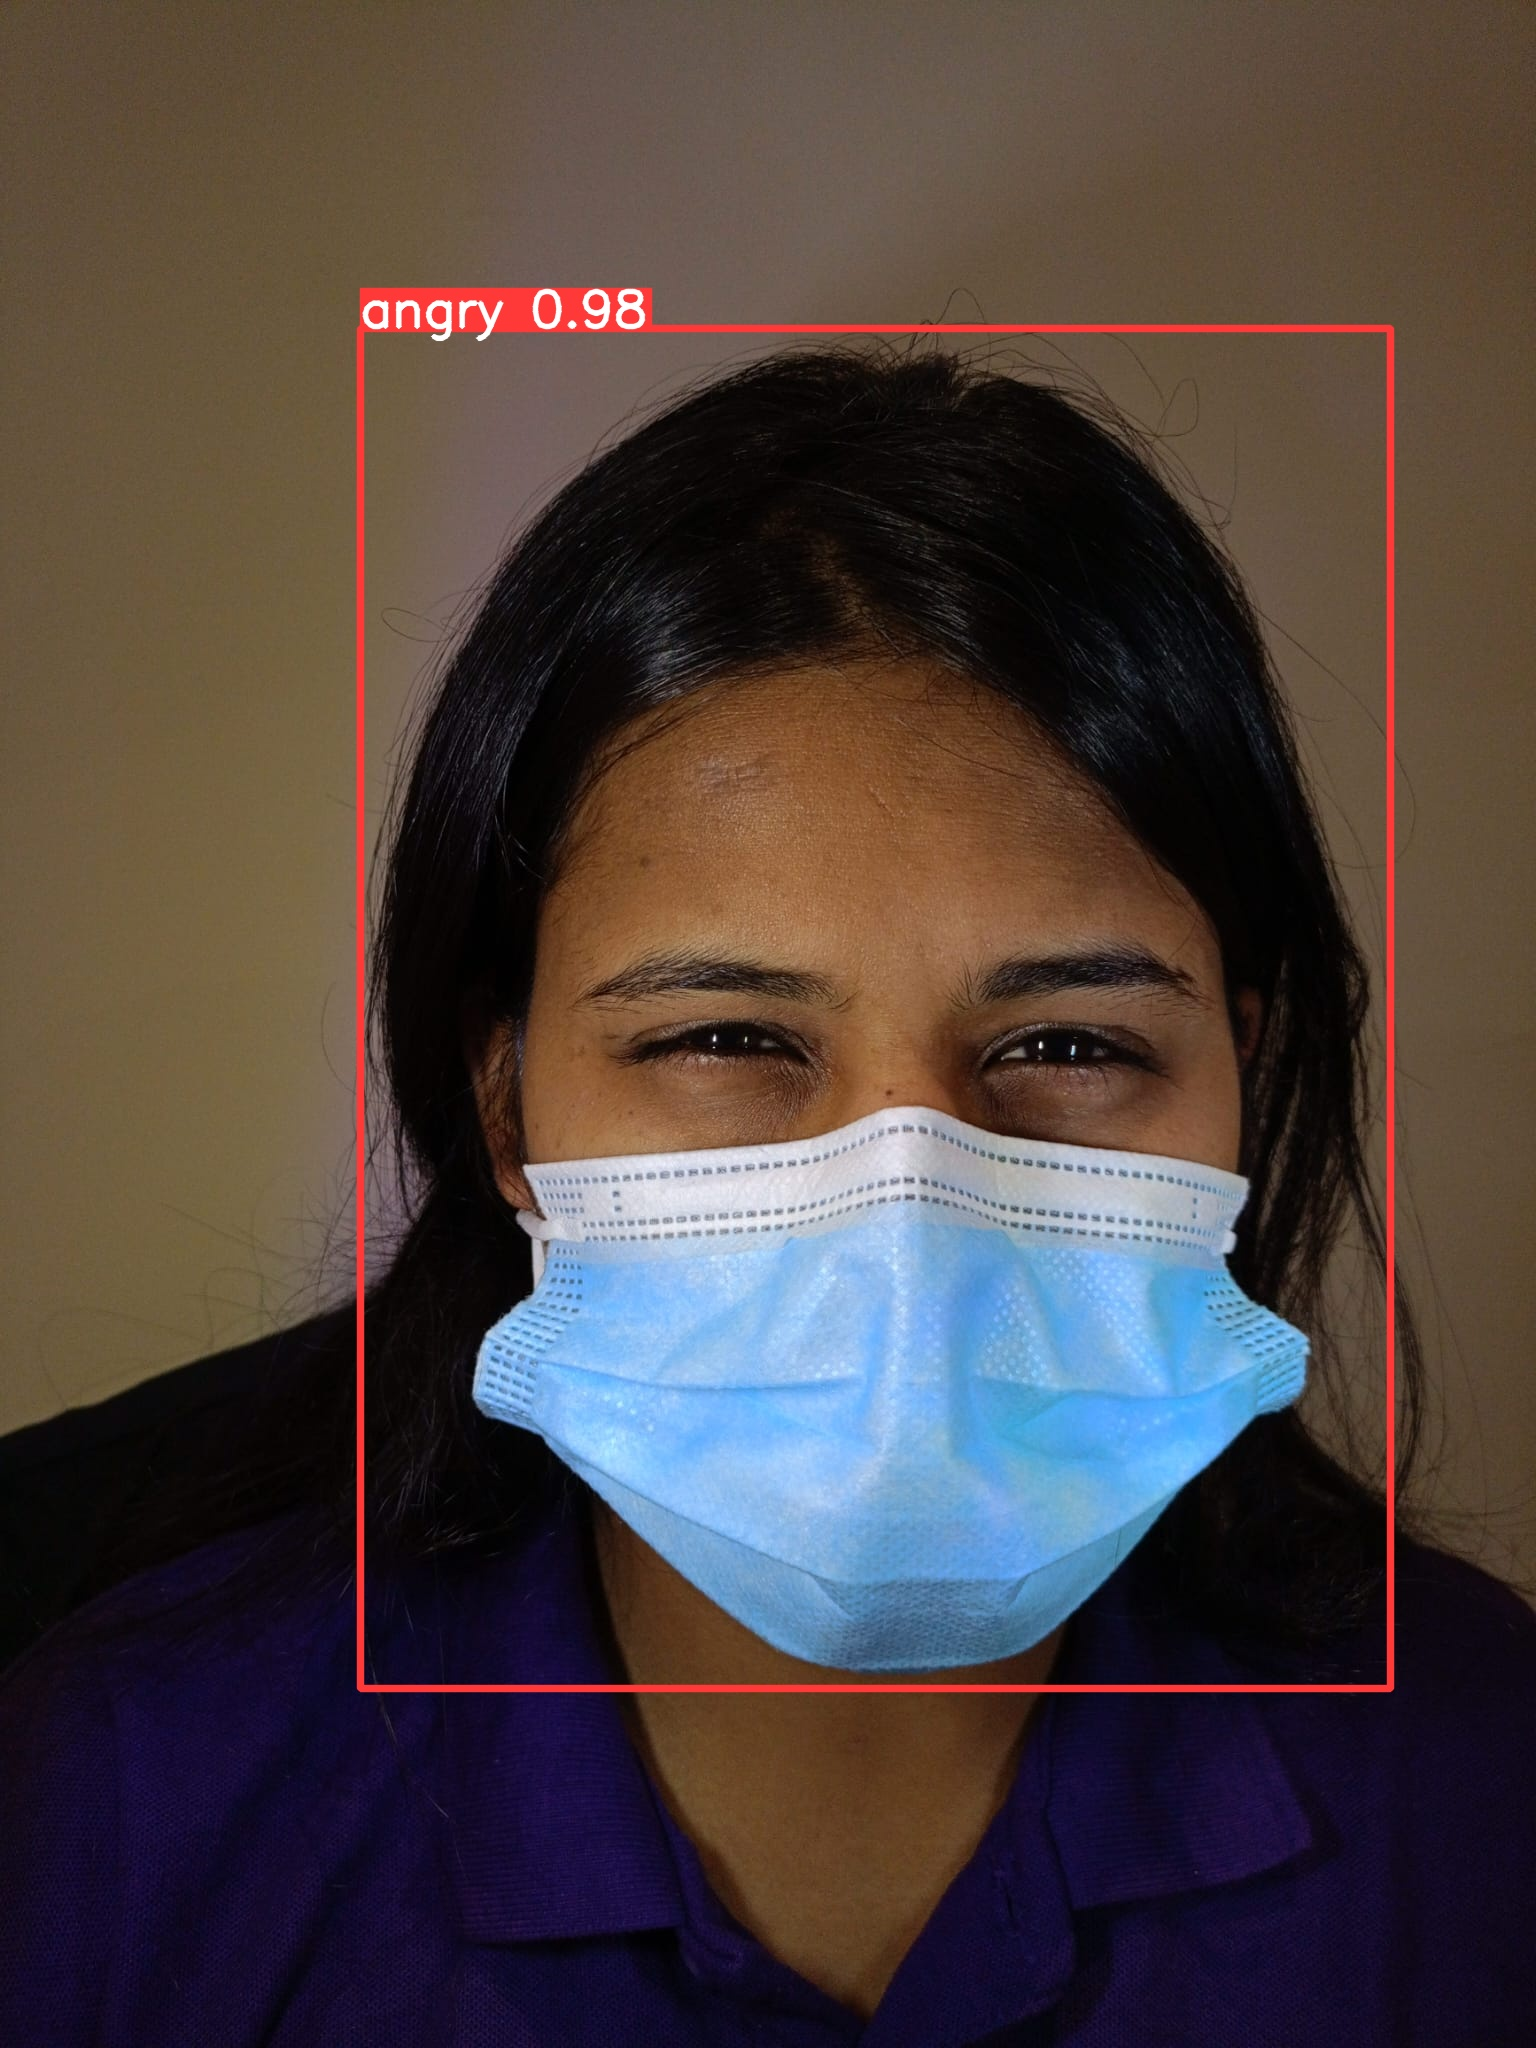

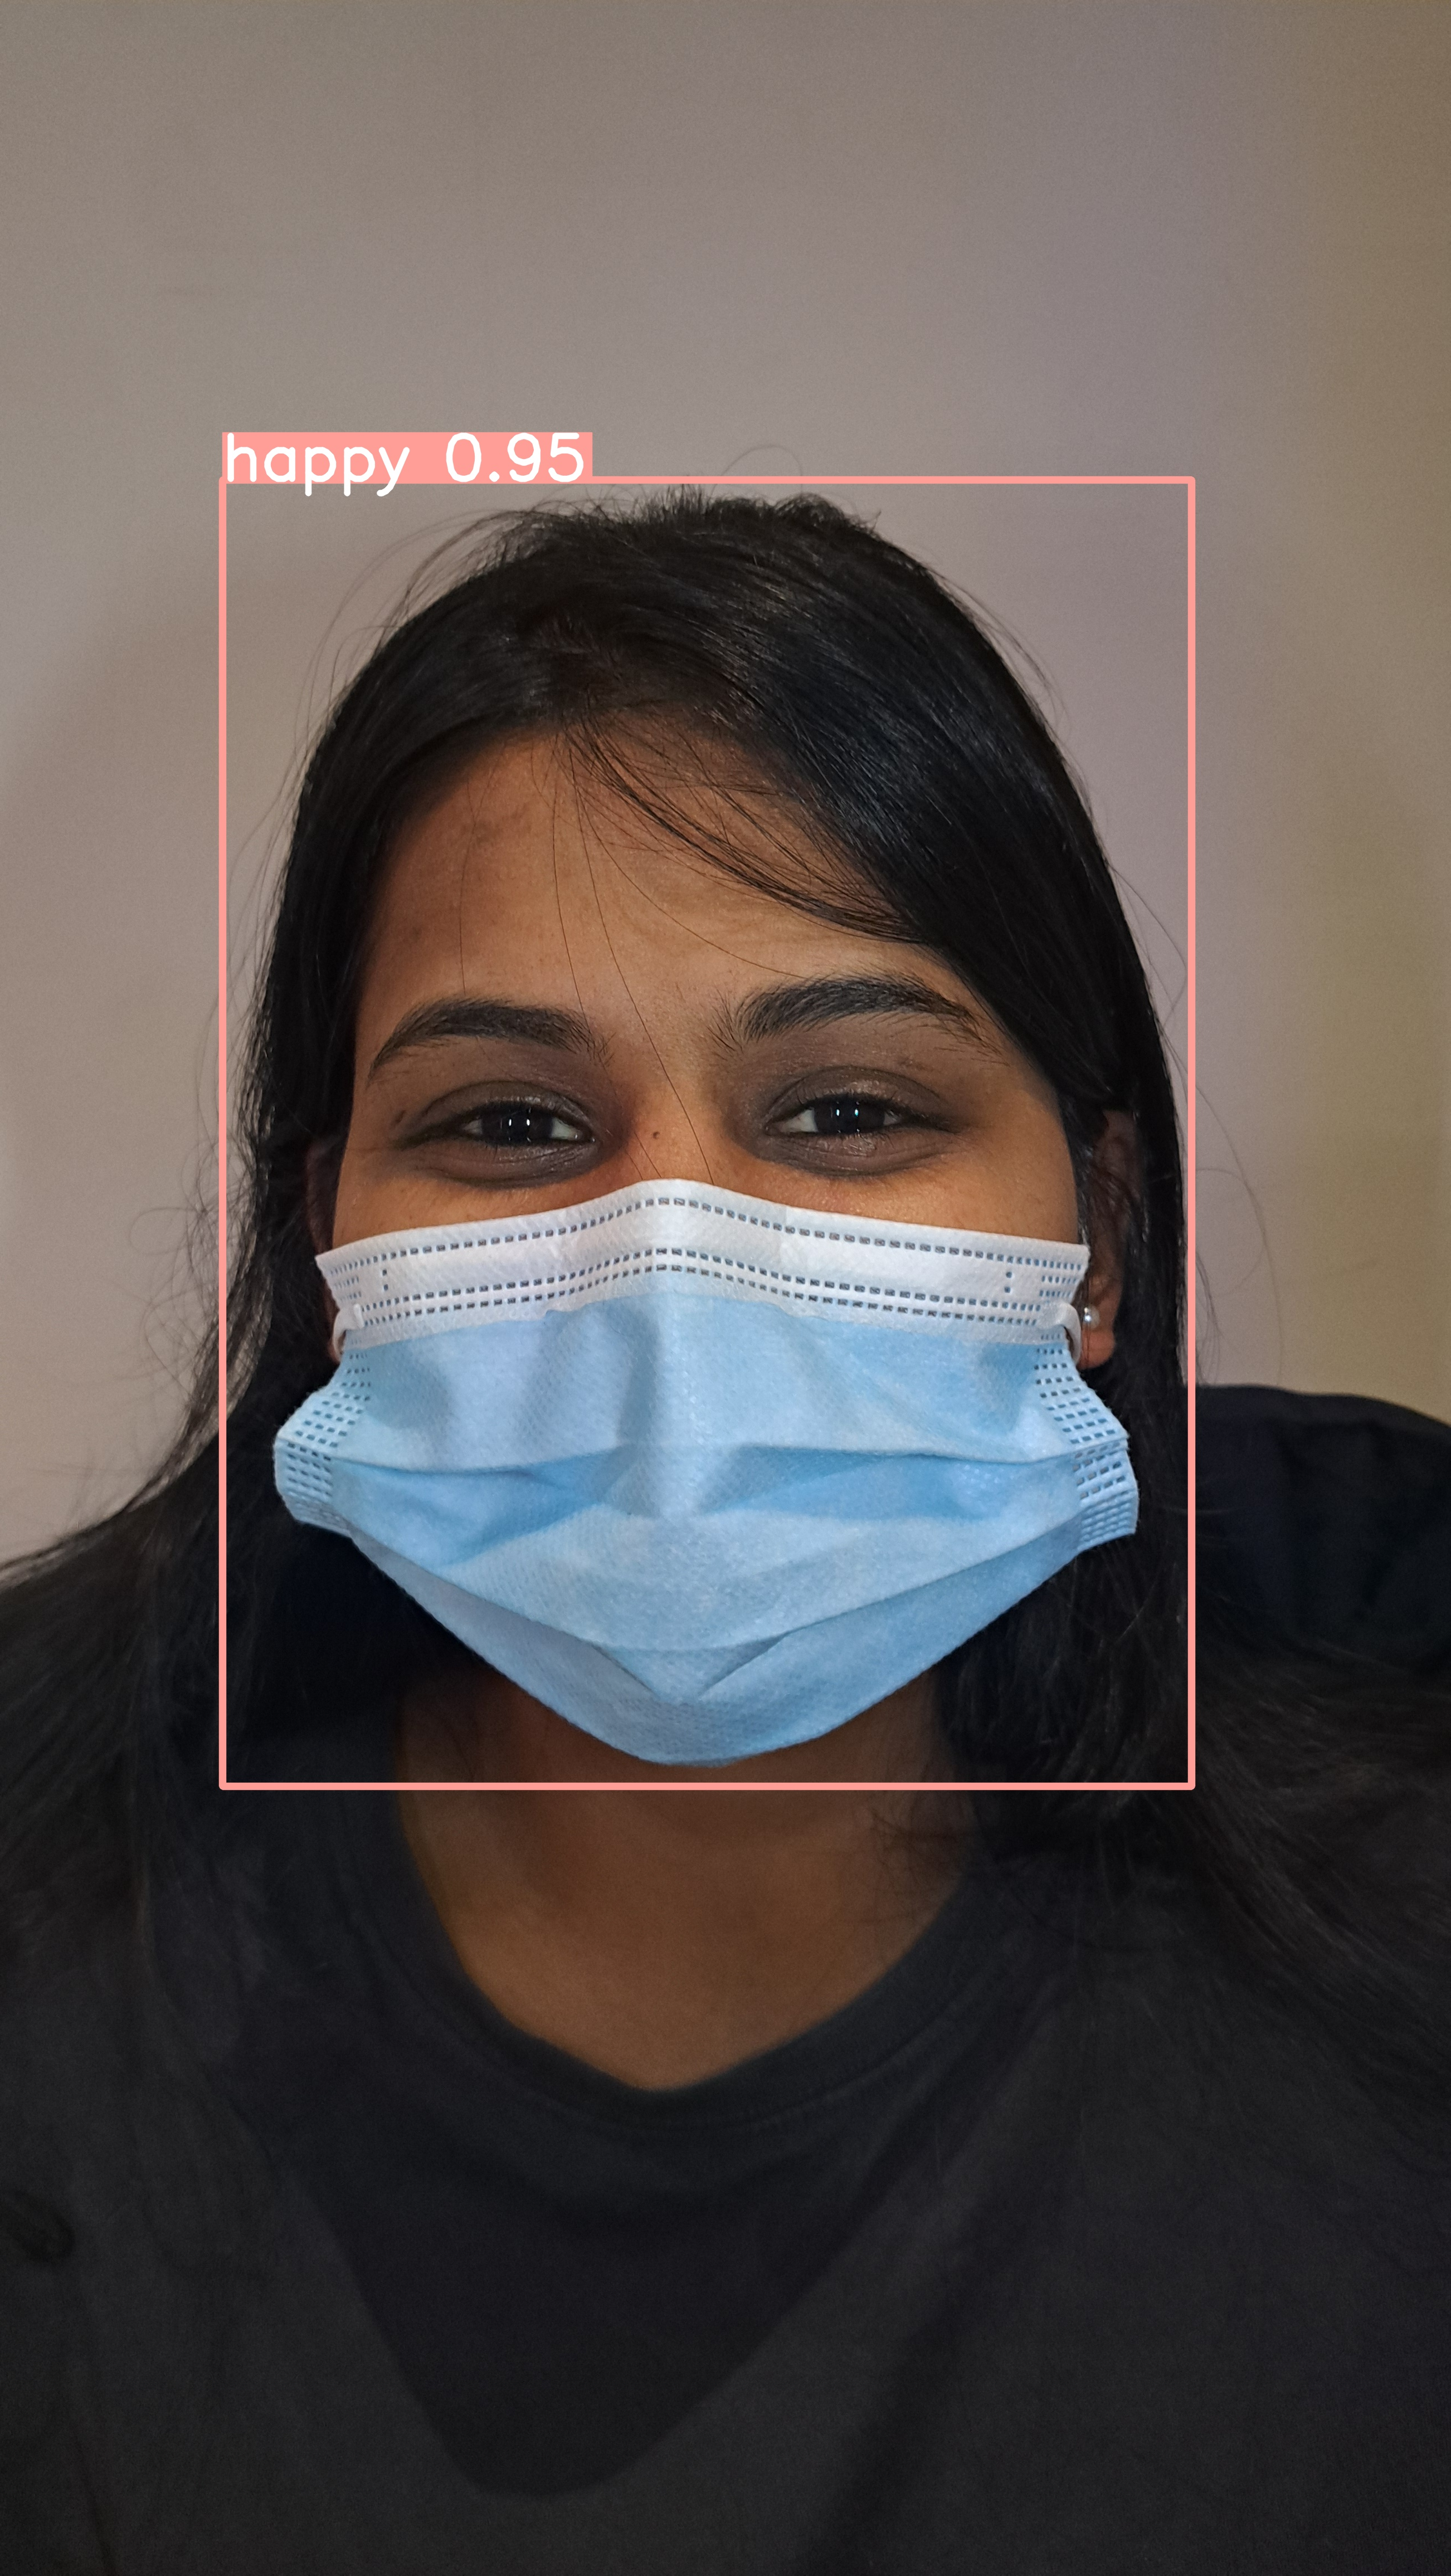

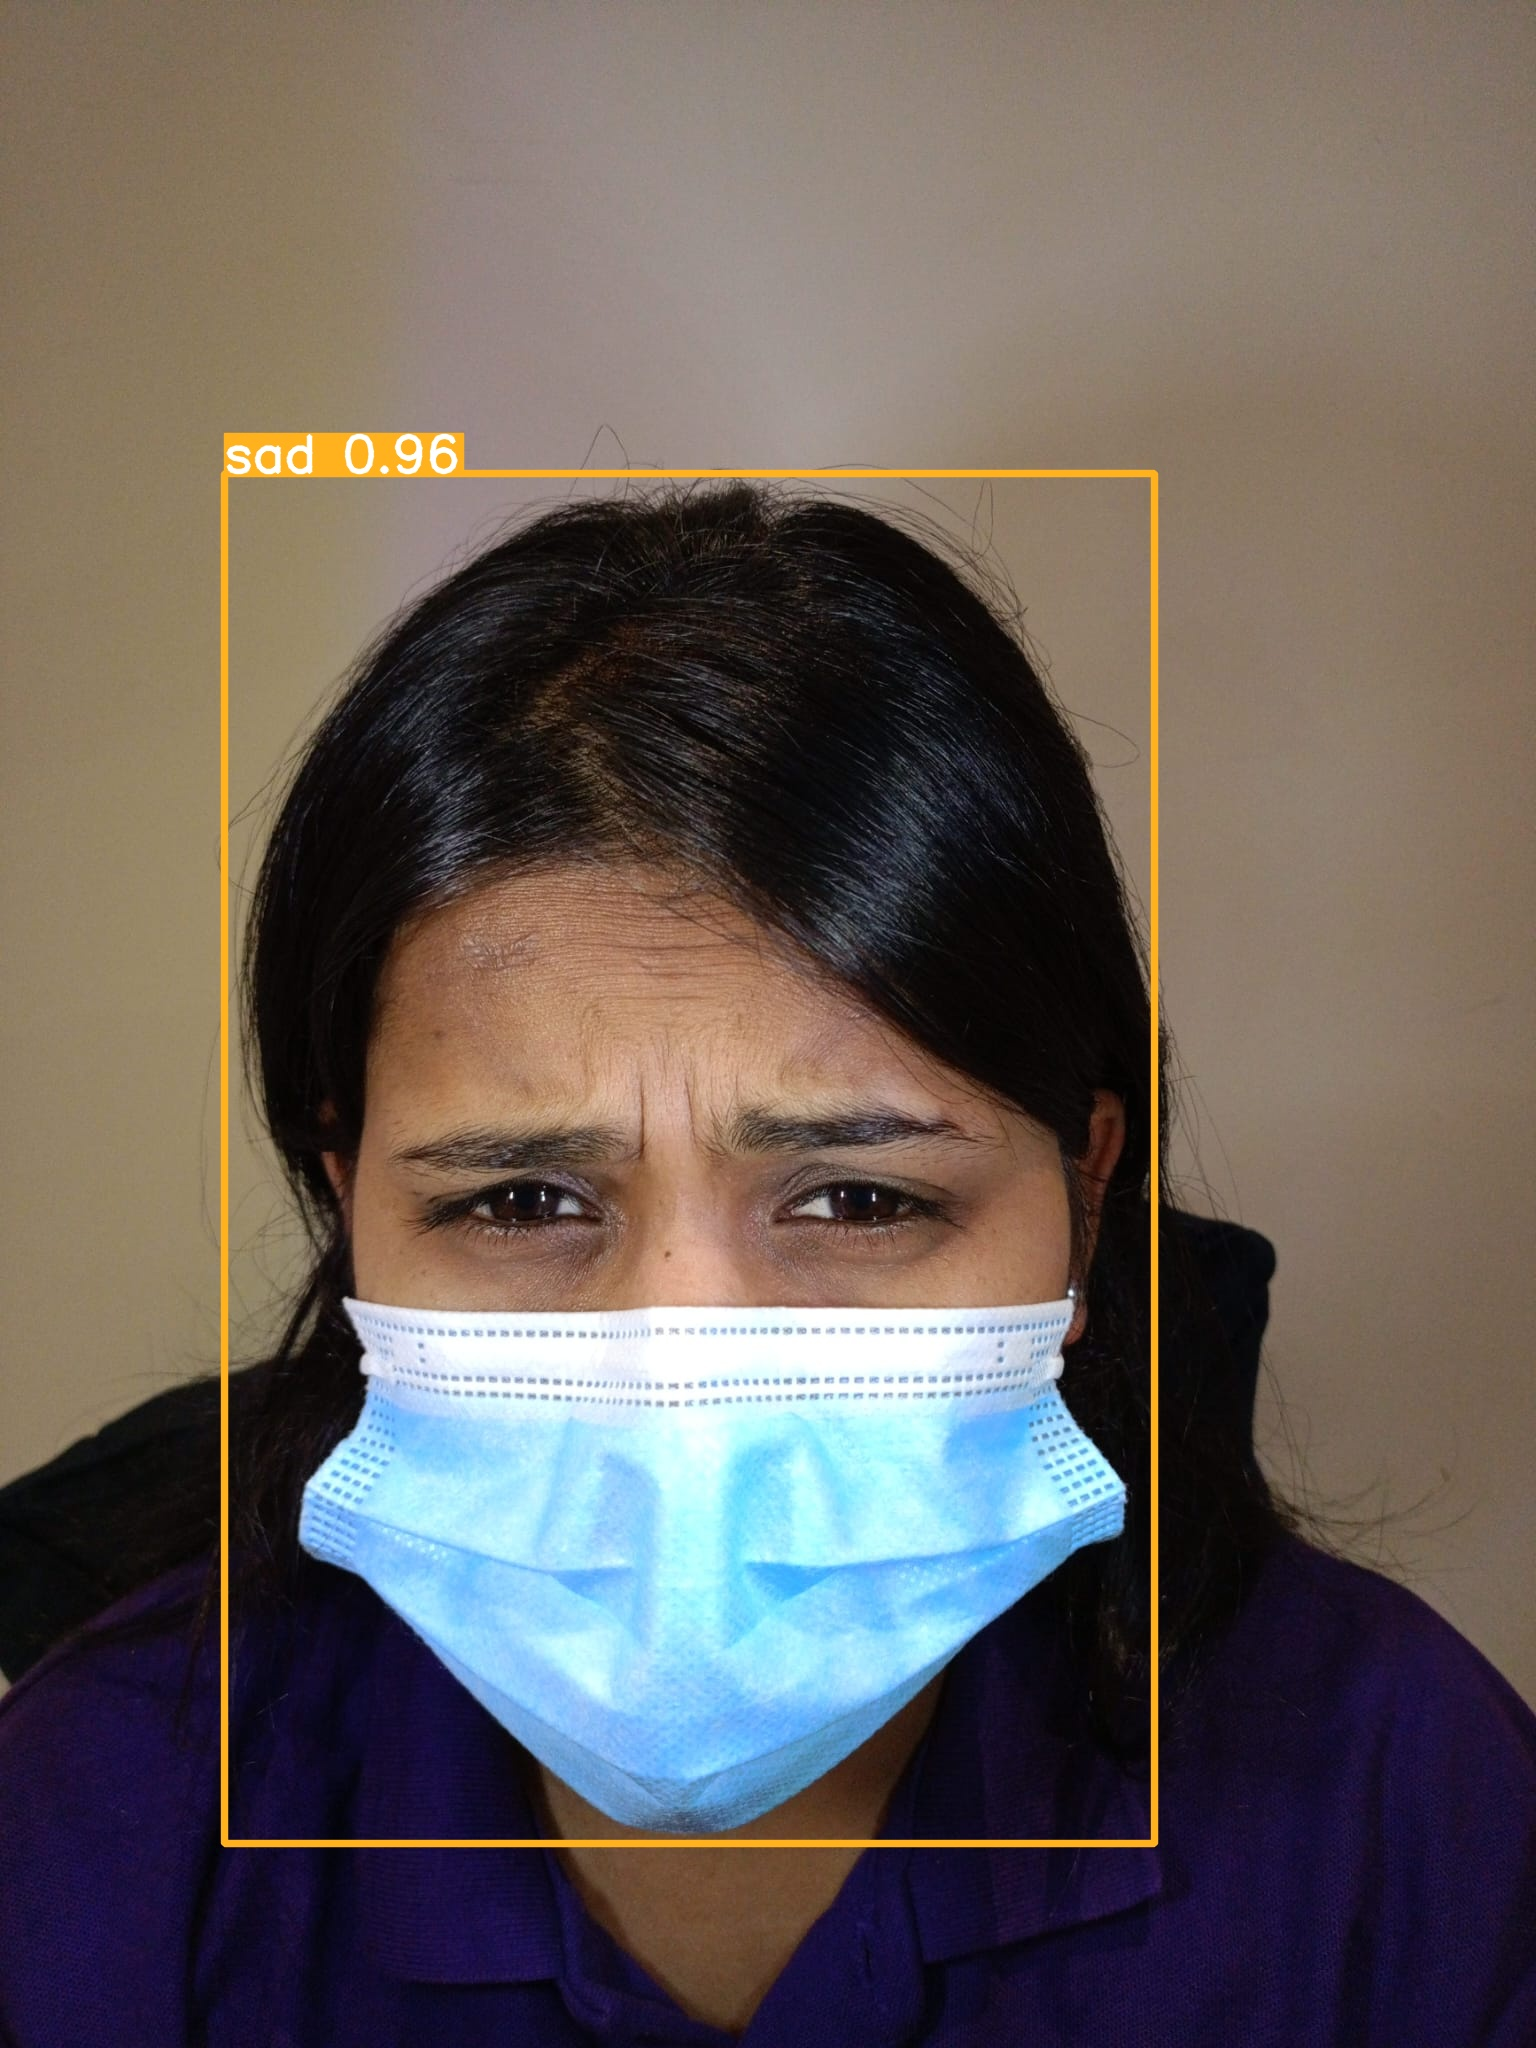

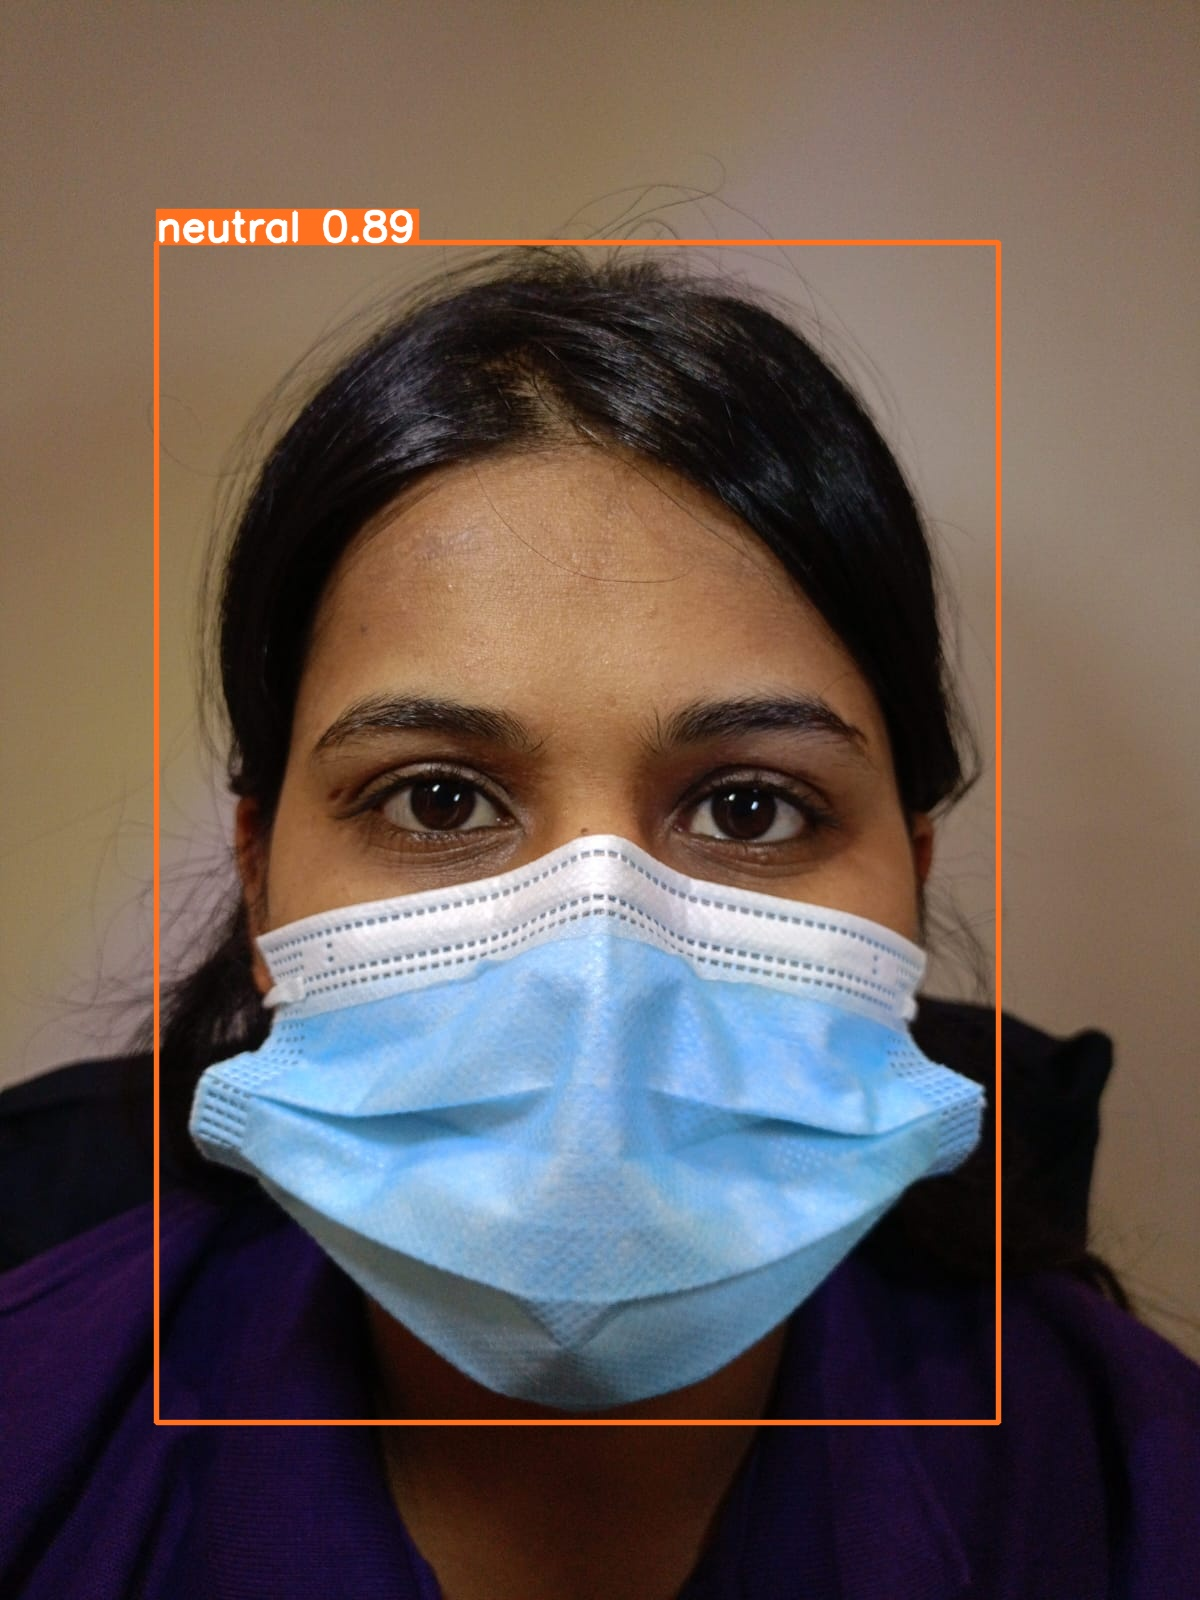

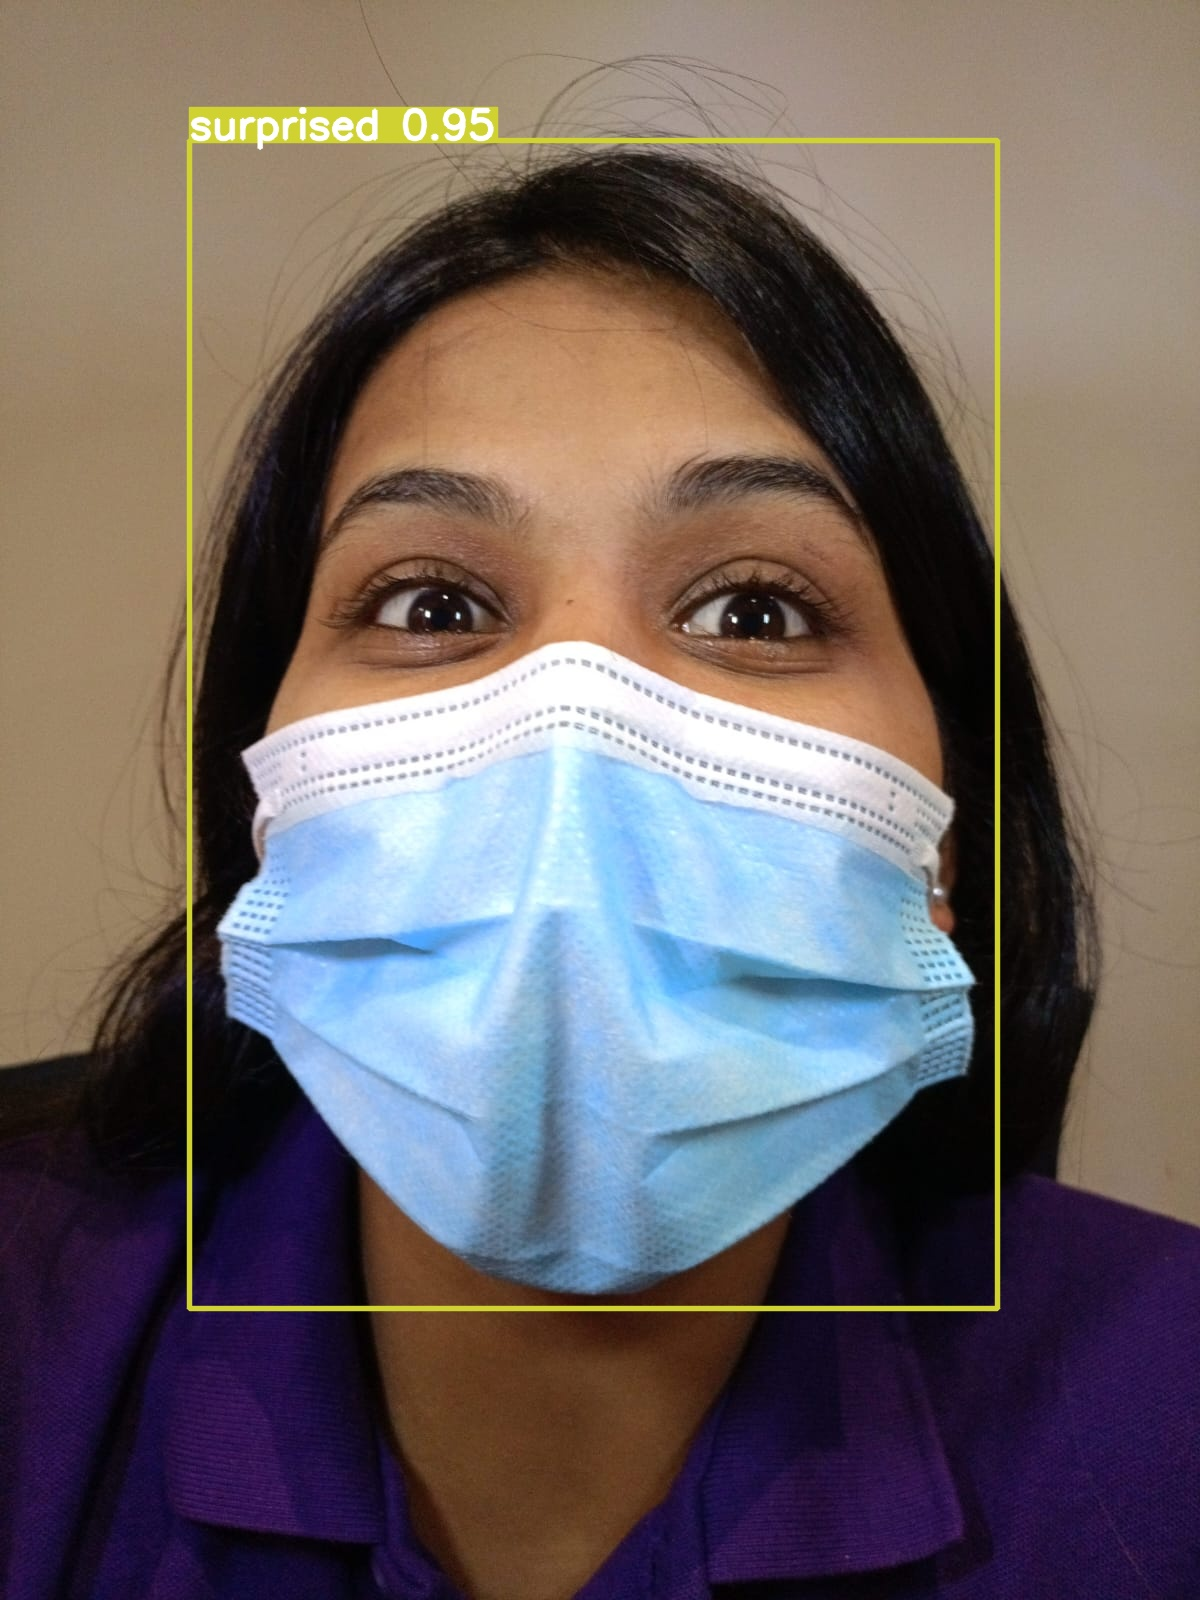

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")